# Uber Fare Prediction Project

## Project Overview
This a small school project for my Data Science class aims to predict Uber ride fares using machine learning regression models. We analyze historical Uber ride data to build and compare multiple predictive models, ultimately selecting the best performer for fare estimation.

## Objectives
- Perform data cleaning and preprocessing
- Build and tune multiple regression models
- Compare model performance and select the best model
- Generate predictions on a test dataset

## Variables Description
The dataset contains information about Uber rides including:
- **fare_amount**: The fare charged for the ride (target variable)
- **pickup_datetime**: Date and time when the ride started
- **pickup_longitude**: Longitude coordinate of pickup location
- **pickup_latitude**: Latitude coordinate of pickup location
- **dropoff_longitude**: Longitude coordinate of dropoff location
- **dropoff_latitude**: Latitude coordinate of dropoff location
- **passenger_count**: Number of passengers in the ride
- **pickup_year**: Year extracted from pickup datetime
- **pickup_month**: Month extracted from pickup datetime
- **pickup_weekday**: Day of the week extracted from pickup datetime
- **pickup_hour**: Hour extracted from pickup datetime
- **pickup_season**: Season of the year in which the trip took place
- **pickup_period**: The moment of the day when the trip was made
- **geo_distance**: Geographical distance between pickup and dropoff locations

## Data Exploration

In this section, we'll load the dataset and perform initial exploration to understand its structure, check for missing values, and identify any data quality issues.

### Import Libraries
- **pandas & numpy**: Data manipulation and numerical operations
- **matplotlib & seaborn**: Data visualization
- **sklearn**: Machine learning models, preprocessing, and evaluation tools
- **joblib**: Model serialization for saving trained models

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import LinearSVR
from sklearn.neural_network import MLPRegressor

from sklearn.model_selection import GridSearchCV, cross_val_score

import joblib

%store -r

## Load the Dataset

Loading the training and validation csv

In [2]:
df = pd.read_csv('data/uber_train_validation.csv')

### Initial Data Inspection

Let's examine the first few rows to understand the data structure.

In [3]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,geo_distance
0,8.1,2010-01-05 12:46:37+00:00,-73.997719,40.741156,-73.976336,40.740022,1,2010,1,1,12,Winter,Afternoon,1.805911
1,4.9,2011-02-05 12:11:00+00:00,-74.010218,40.711418,-74.004135,40.725397,1,2011,2,5,12,Winter,Afternoon,1.636753
2,16.1,2012-03-08 02:13:00+00:00,-73.982152,40.764017,-73.891160,40.746512,1,2012,3,3,2,Spring,Night,7.907627
3,19.3,2011-10-03 22:20:55+00:00,-74.000808,40.728923,-73.979544,40.653311,1,2011,10,0,22,Autumn,Night,8.596692
4,3.5,2013-07-23 19:21:53+00:00,-73.985567,40.723071,-73.991561,40.726360,1,2013,7,1,19,Summer,Evenning,0.623609


### Statistical Summary

Generate descriptive statistics to understand the distribution of numerical features.

In [4]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,geo_distance
count,158000.000000,158000.000000,158000.000000,158000.000000,158000.000000,158000.000000,158000.000000,158000.000000,158000.000000,158000.000000,158000.000000
mean,11.329309,-73.910131,40.687741,-73.909246,40.687950,1.690595,2011.746854,6.281000,3.050816,13.492854,3.396730
std,9.511901,2.700447,2.650642,2.700566,2.650906,1.305403,1.863625,3.444175,1.945089,6.507205,4.024804
min,2.500000,-75.426904,-74.015515,-75.458979,-74.009857,1.000000,2009.000000,1.000000,0.000000,0.000000,0.050318
25%,6.000000,-73.992240,40.736525,-73.991610,40.735332,1.000000,2010.000000,3.000000,1.000000,9.000000,1.290341
50%,8.500000,-73.982139,40.753317,-73.980580,40.753738,1.000000,2012.000000,6.000000,3.000000,14.000000,2.188168
75%,12.500000,-73.968504,40.767605,-73.965662,40.768332,2.000000,2013.000000,9.000000,5.000000,19.000000,3.959056
max,190.830000,40.808425,42.478467,40.831932,42.464187,6.000000,2015.000000,12.000000,6.000000,23.000000,177.995655


### Dataset Dimensions

Check the number of rows and columns in the dataset.

In [5]:
df.shape

(158000, 14)

### Data Types

Examine the data types of each column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158000 entries, 0 to 157999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        158000 non-null  float64
 1   pickup_datetime    158000 non-null  object 
 2   pickup_longitude   158000 non-null  float64
 3   pickup_latitude    158000 non-null  float64
 4   dropoff_longitude  158000 non-null  float64
 5   dropoff_latitude   158000 non-null  float64
 6   passenger_count    158000 non-null  int64  
 7   pickup_year        158000 non-null  int64  
 8   pickup_month       158000 non-null  int64  
 9   pickup_weekday     158000 non-null  int64  
 10  pickup_hour        158000 non-null  int64  
 11  pickup_season      158000 non-null  object 
 12  pickup_period      158000 non-null  object 
 13  geo_distance       158000 non-null  float64
dtypes: float64(6), int64(5), object(3)
memory usage: 16.9+ MB


### Unique Values Count

Identify the number of unique values in each column to understand data cardinality.

In [7]:
df.nunique()

fare_amount            1084
pickup_datetime      155883
pickup_longitude      64661
pickup_latitude       75475
dropoff_longitude     69392
dropoff_latitude      80776
passenger_count           6
pickup_year               7
pickup_month             12
pickup_weekday            7
pickup_hour              24
pickup_season             4
pickup_period             4
geo_distance         157985
dtype: int64

### Missing and Duplicated Values Detection

Check if there are any missing or duplicated values in the dataset

In [8]:
any(df.isnull())

True

In [22]:
any(df.duplicated())

False

### Data Cleaning: Remove Missing Values

Drop rows with missing values to ensure data quality for model training.

In [9]:
df.dropna(inplace=True)

### Verify Dataset Size After Cleaning

Confirm the dataset dimensions after removing missing values.

In [10]:
df.shape

(158000, 14)

### Feature Engineering: Remove Datetime Column

Remove the raw `pickup_datetime` column since we've already extracted useful time-based features from it (year, month, weekday, hour).

In [11]:
df.drop(columns='pickup_datetime', inplace=True)

## Exploratory Data Analysis (EDA)

Now that we have clean data, let's visualize the distributions and relationships between features to gain deeper insights.

### Feature Distributions

Visualize the distribution of key features to understand their patterns:
- **passenger_count**: Most rides have 1-2 passengers
- **pickup_year, pickup_month, pickup_weekday, pickup_hour**: Temporal patterns
- **geo_distance**: Distance between pickup and dropoff locations

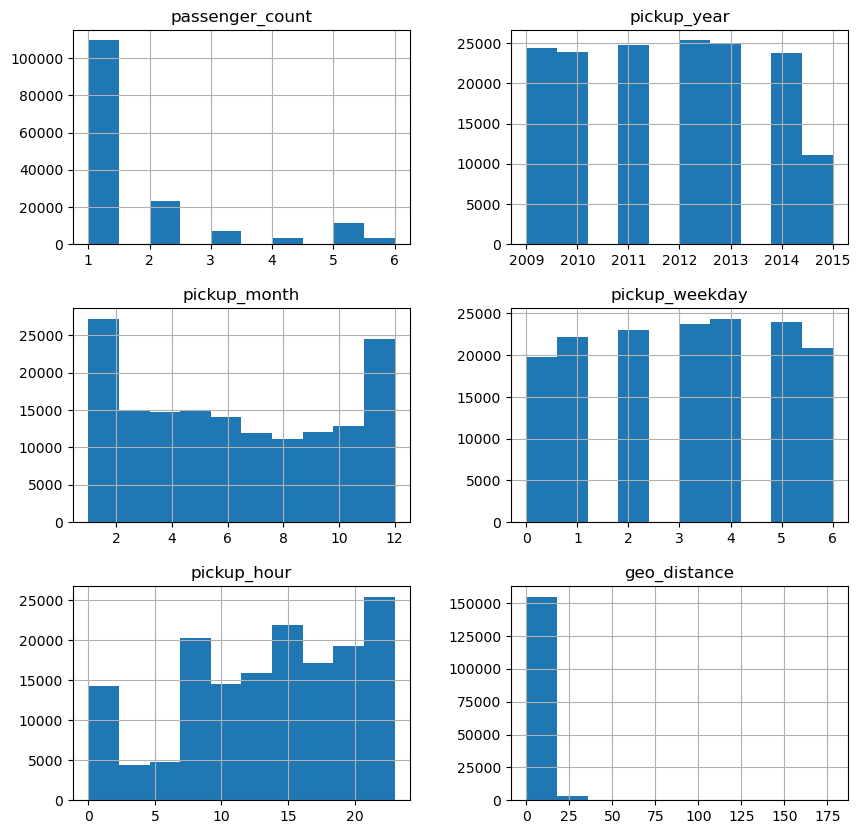

In [12]:
atributes = ['passenger_count','pickup_year','pickup_month','pickup_weekday','pickup_hour','geo_distance']

df[atributes].hist(figsize=(10,10))
plt.show()

### Correlation Analysis

Create a heatmap to visualize correlations between numerical features. This helps identify:
- Which features are strongly correlated with the target (fare_amount)
- Potential multicollinearity between features

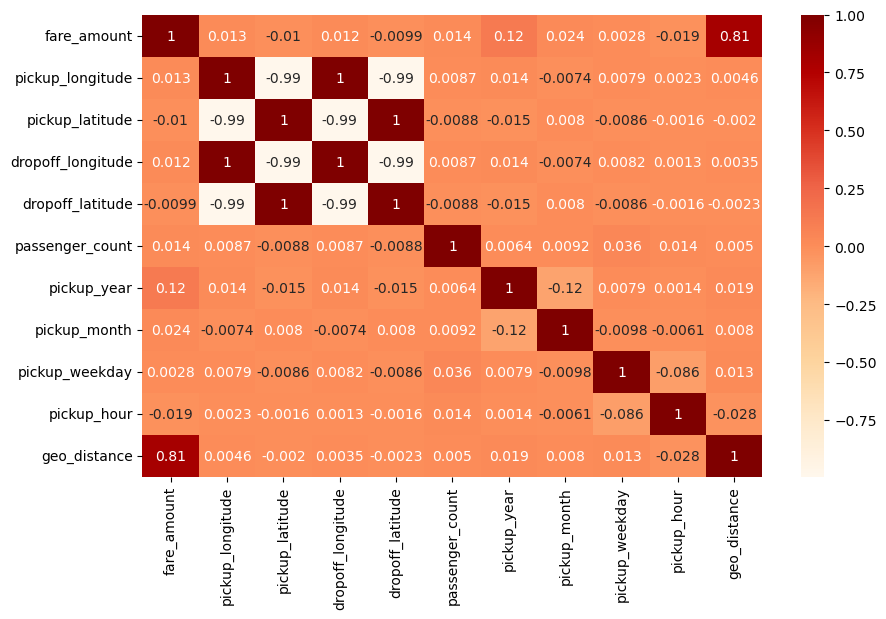

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(data=df.corr(numeric_only=True), annot=True, cmap='OrRd')

plt.show()

### Prepare Features and Target

Separate the dataset into:
- **X**: Feature matrix (all columns except fare_amount)
- **y**: Target vector (fare_amount we want to predict)

In [14]:
X = df.drop(columns='fare_amount', axis=1)
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,geo_distance
0,-73.997719,40.741156,-73.976336,40.740022,1,2010,1,1,12,Winter,Afternoon,1.805911
1,-74.010218,40.711418,-74.004135,40.725397,1,2011,2,5,12,Winter,Afternoon,1.636753
2,-73.982152,40.764017,-73.891160,40.746512,1,2012,3,3,2,Spring,Night,7.907627
3,-74.000808,40.728923,-73.979544,40.653311,1,2011,10,0,22,Autumn,Night,8.596692
4,-73.985567,40.723071,-73.991561,40.726360,1,2013,7,1,19,Summer,Evenning,0.623609


In [15]:
y = df['fare_amount']
y.head()

0     8.1
1     4.9
2    16.1
3    19.3
4     3.5
Name: fare_amount, dtype: float64

### Identify Feature Types

Categorize features by data type for appropriate preprocessing:
- **Numerical features**: Require scaling/standardization
- **Categorical features**: Require encoding (one-hot encoding)

In [16]:
list_num = X.select_dtypes(include='number').columns.to_list()
list_cat = X.select_dtypes(include='object').columns.to_list()

print(list_num)
print(list_cat)

['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'pickup_year', 'pickup_month', 'pickup_weekday', 'pickup_hour', 'geo_distance']
['pickup_season', 'pickup_period']


### Create Preprocessing Pipelines

Build transformation pipelines for each feature type:
- **Numerical Pipeline**: StandardScaler to normalize numerical features
- **Categorical Pipeline**: OneHotEncoder to convert categorical variables to binary columns

In [17]:
num_transformation = Pipeline([('scaler', StandardScaler())])
cat_transformation = Pipeline([('onehot', OneHotEncoder())])

### Combine Transformations

Use ColumnTransformer to apply different preprocessing steps to different feature types simultaneously.

In [18]:
transformation = ColumnTransformer([('num', num_transformation, list_num),
                                    ('cat', cat_transformation, list_cat)])

## Model Tuning

We'll train and optimize four different regression models using GridSearchCV to find the best hyperparameters for each. The models will be evaluated using 5-fold cross-validation with negative mean squared error as the scoring metric.

- ## Model 1: Linear Regression

Linear Regression is a simple baseline model that assumes a linear relationship between features and the target variable. We'll tune parameters like `fit_intercept`, `copy_X`, and `positive` to optimize performance.

### Initialize Linear Regression Model

In [19]:
linear_regression = LinearRegression()

### View Available Hyperparameters

In [20]:
linear_regression.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'positive': False,
 'tol': 1e-06}

### Create Pipeline with Preprocessing and Model

In [21]:
LR_model = Pipeline([('transformer', transformation),
                     ('linear_regression', linear_regression)])

### Define Hyperparameter Grid and GridSearchCV

Testing different combinations of parameters to find the optimal configuration.

In [22]:
parameters_LR = {
    'linear_regression__fit_intercept': [True, False],
    'linear_regression__copy_X': [True, False],
    'linear_regression__positive': [True, False],
}

grid_LR = GridSearchCV(LR_model, param_grid=parameters_LR, cv=5,
                       scoring='neg_mean_squared_error', n_jobs=-2, verbose=2)

### Fit Grid Search

Train the model with all parameter combinations using cross-validation.

In [23]:
grid_LR.fit(X,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


,estimator,Pipeline(step...egression())])
,param_grid,"{'linear_regression__copy_X': [True, False], 'linear_regression__fit_intercept': [True, False], 'linear_regression__positive': [True, False]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-2
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


### Extract Best Parameters

In [24]:
LR_best_params = grid_LR.best_params_
LR_best_params

{'linear_regression__copy_X': True,
 'linear_regression__fit_intercept': False,
 'linear_regression__positive': False}

### Create Tuned Model with Best Parameters

In [25]:
linear_regression_tunned  = LinearRegression(
    copy_X= LR_best_params['linear_regression__copy_X'],
    fit_intercept= LR_best_params['linear_regression__fit_intercept'],
    n_jobs= -2,
    positive= LR_best_params['linear_regression__positive']
)

### Build Final Pipeline with Tuned Model

In [26]:
LR_model_tunned = Pipeline([('transformer', transformation),
                            ('linear_regression_tunned', linear_regression_tunned)])

### Train the Final Model

In [27]:
LR_model_tunned.fit(X,y)

,steps,"[('transformer', ...), ('linear_regression_tunned', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Evaluate with Cross-Validation

In [28]:
cv_LR_tunned = cross_val_score(LR_model_tunned, X, y,
                               scoring='neg_mean_squared_error', cv=5)

cv_LR_tunned

array([-26.8429947 , -26.59066309, -37.28705974, -31.55924989,
       -28.14562772])

### Calculate RMSE Statistics

Convert negative MSE to RMSE (Root Mean Squared Error) for interpretability. RMSE represents the average prediction error in dollars.

In [29]:
rmse_LR_tunned = np.sqrt(-cv_LR_tunned)
media_LR_tunned = rmse_LR_tunned.mean()
std_LR_tunned = rmse_LR_tunned.std()

print(media_LR_tunned, std_LR_tunned)

%store media_LR_tunned
%store std_LR_tunned

5.4733912980621175 0.3565203015466748
Stored 'media_LR_tunned' (float64)
Stored 'std_LR_tunned' (float64)


### Save the Trained Model

In [30]:
joblib.dump(LR_model_tunned, 'models/LR_model_tunned.joblib')

['models/LR_model_tunned.joblib']

- ## Model 2: Random Forest

Random Forest is an ensemble method that combines multiple decision trees to improve prediction accuracy and reduce overfitting. We'll tune the number of trees, maximum depth, and minimum samples for splitting.

### Initialize Random Forest Model

In [31]:
RF_regression = RandomForestRegressor()

### View Available Hyperparameters

In [32]:
RF_regression.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Create Pipeline

In [33]:
RF_model = Pipeline([('transformer', transformation),
                     ('RF_regression', RF_regression)])

### Define Hyperparameter Grid

Testing combinations of:
- **n_estimators**: Number of trees in the forest
- **max_depth**: Maximum depth of each tree
- **min_samples_split**: Minimum samples required to split a node

In [34]:
parameters_RF = {
    'RF_regression__n_estimators': [80, 120, 180],
    'RF_regression__max_depth': [6, 10],
    'RF_regression__min_samples_split': [5, 10,15]
}

### Setup GridSearchCV

In [35]:
grid_RF = GridSearchCV(RF_model, param_grid=parameters_RF, cv=5,
                       scoring='neg_mean_squared_error', n_jobs=-2, verbose=2)

### Fit Grid Search

In [36]:
grid_RF.fit(X,y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


,estimator,Pipeline(step...Regressor())])
,param_grid,"{'RF_regression__max_depth': [6, 10], 'RF_regression__min_samples_split': [5, 10, ...], 'RF_regression__n_estimators': [80, 120, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-2
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


### Extract Best Parameters

In [37]:
RF_best_params = grid_RF.best_params_
RF_best_params

{'RF_regression__max_depth': 10,
 'RF_regression__min_samples_split': 10,
 'RF_regression__n_estimators': 80}

### Create Tuned Model

In [38]:
RF_regression_tunned = RandomForestRegressor(
    max_depth = RF_best_params['RF_regression__max_depth'],
    min_samples_split = RF_best_params['RF_regression__min_samples_split'],
    n_estimators = RF_best_params['RF_regression__n_estimators'],
    n_jobs=-2
)

### Build Final Pipeline

In [39]:
RF_model_tunned = Pipeline([('transformer', transformation),
                            ('RF_regression_tunned', RF_regression_tunned)])

### Train the Model

In [40]:
RF_model_tunned.fit(X,y)

,steps,"[('transformer', ...), ('RF_regression_tunned', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Cross-Validation Evaluation

In [41]:
cv_RF_tunned = cross_val_score(RF_model_tunned, X, y,
                               scoring='neg_mean_squared_error', cv=5)

cv_RF_tunned

array([-11.46961975, -12.00171959, -12.8555751 , -11.93416469,
       -13.2374479 ])

### Calculate RMSE Statistics

In [42]:
rmse_RF_tunned = np.sqrt( -cv_RF_tunned  )
media_RF_tunned = rmse_RF_tunned.mean()
std_RF_tunned = rmse_RF_tunned.std()
print(   media_RF_tunned , std_RF_tunned )

%store media_RF_tunned
%store std_RF_tunned

3.5058832262214343 0.09213147865682643
Stored 'media_RF_tunned' (float64)
Stored 'std_RF_tunned' (float64)


### Save the Model

In [43]:
joblib.dump(RF_model_tunned, 'models/RF_model_tunned.joblib')

['models/RF_model_tunned.joblib']

- ## Model 3: Linear Support Vector Regression (SVR)

Linear SVR uses support vector machines for regression tasks. It's effective for high-dimensional data and can handle outliers well. We'll tune the regularization parameter (C) and epsilon (margin of tolerance).

### Initialize Linear SVR Model

In [ ]:
SVM_lineal_regression = LinearSVR()

### View Available Hyperparameters

In [ ]:
SVM_lineal_regression.get_params()

{'C': 1.0,
 'dual': 'auto',
 'epsilon': 0.0,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'loss': 'epsilon_insensitive',
 'max_iter': 1000,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

### Create Pipeline

In [ ]:
SVM_model = Pipeline([('transformer', transformation),
                      ('SVM_regression', SVM_lineal_regression)])

### Define Hyperparameter Grid

Testing combinations of:
- **C**: Regularization parameter (controls trade-off between margin and training error)
- **epsilon**: Tolerance margin for predictions

In [26]:
parameters_SVM = {
    'SVM_regression__C': [1, 10, 100],
    'SVM_regression__epsilon': [0, 0.01, 0.1]
}

### Setup GridSearchCV

In [27]:
grid_SVM = GridSearchCV(SVM_model, param_grid=parameters_SVM, cv=5,
                        scoring='neg_mean_squared_error', n_jobs=-2, verbose=2)

### Fit Grid Search

In [28]:
grid_SVM.fit(X,y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\Chava\AppData\Roaming\Python\Python313\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,estimator,Pipeline(step...LinearSVR())])
,param_grid,"{'SVM_regression__C': [1, 10, ...], 'SVM_regression__epsilon': [0, 0.01, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-2
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


### Extract Best Parameters

In [29]:
SVM_best_params = grid_SVM.best_params_
SVM_best_params

{'SVM_regression__C': 1, 'SVM_regression__epsilon': 0.1}

### Create Tuned Model

In [30]:
SVM_lineal_regression_tunned = LinearSVR(
    C = SVM_best_params['SVM_regression__C'],
    epsilon = SVM_best_params['SVM_regression__epsilon']
)

### Build Final Pipeline

In [31]:
SVM_model_tunned = Pipeline([('transformer', transformation),
                             ('SVM_regression_tunned', SVM_lineal_regression_tunned)])

### Train the Model

In [32]:
SVM_model_tunned.fit(X,y)

C:\Users\Chava\AppData\Roaming\Python\Python313\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,steps,"[('transformer', ...), ('SVM_regression_tunned', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Cross-Validation Evaluation

In [33]:
cv_SVM_tunned = cross_val_score(SVM_model_tunned, X,y, scoring='neg_mean_squared_error', cv=5)

cv_SVM_tunned

C:\Users\Chava\AppData\Roaming\Python\Python313\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Chava\AppData\Roaming\Python\Python313\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Chava\AppData\Roaming\Python\Python313\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Chava\AppData\Roaming\Python\Python313\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Chava\AppData\Roaming\Python\Python313\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([-27.94557628, -26.56919803, -43.12576654, -35.59637334,
       -30.68851155])

### Calculate RMSE Statistics

In [35]:
rmse_SVM_tunned = np.sqrt(- cv_SVM_tunned)

media_SVM_tunned = rmse_SVM_tunned.mean()
std_SVM_tunned = rmse_SVM_tunned.std()

print(media_SVM_tunned, std_SVM_tunned)

%store media_SVM_tunned
%store std_SVM_tunned

5.7027802748153995 0.513207836221481
Stored 'media_SVM_tunned' (float64)
Stored 'std_SVM_tunned' (float64)


### Save the Model

In [36]:
joblib.dump(SVM_model_tunned, 'models/SVM_model_tunned.joblib')

['models/SVM_model_tunned.joblib']

- ## Model 4: Multi-layer Perceptron (MLP) Regressor

MLP is a neural network model that can learn complex non-linear relationships. We'll tune the network architecture (hidden layers), activation function, learning rate, and optimization algorithm.

### Initialize MLP Model

In [37]:
MLP_regression = MLPRegressor()

### View Available Hyperparameters

In [38]:
MLP_regression.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'loss': 'squared_error',
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

### Create Pipeline

In [39]:
MLP_model = Pipeline([('transformer', transformation),
                      ('MLP_regression', MLP_regression)])

### Define Hyperparameter Grid

Testing combinations of:
- **hidden_layer_sizes**: Network architecture (number of neurons per layer)
- **activation**: Activation function (relu, tanh)
- **learning_rate_init**: Initial learning rate
- **solver**: Optimization algorithm (adam, lbfgs)

In [40]:
parameters_MLP = {
    'MLP_regression__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'MLP_regression__activation': ['relu', 'tanh'],
    'MLP_regression__learning_rate_init': [0.001,   0.05],
    'MLP_regression__solver': ['adam', 'lbfgs']
}

### Setup GridSearchCV

In [41]:
grid_MLP = GridSearchCV(  MLP_model, parameters_MLP,
                         cv=5, n_jobs=-2, scoring='neg_mean_squared_error')

### Fit Grid Search

In [42]:
grid_MLP.fit(X,y)

C:\Users\Chava\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,estimator,Pipeline(step...Regressor())])
,param_grid,"{'MLP_regression__activation': ['relu', 'tanh'], 'MLP_regression__hidden_layer_sizes': [(50,), (100,), ...], 'MLP_regression__learning_rate_init': [0.001, 0.05], 'MLP_regression__solver': ['adam', 'lbfgs']}"
,scoring,'neg_mean_squared_error'
,n_jobs,-2
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...)]"


### Extract Best Parameters

In [43]:
MLP_best_params = grid_MLP.best_params_
MLP_best_params

{'MLP_regression__activation': 'tanh',
 'MLP_regression__hidden_layer_sizes': (50, 50),
 'MLP_regression__learning_rate_init': 0.001,
 'MLP_regression__solver': 'adam'}

### Create Tuned Model

In [44]:
MLP_regression_tunned = MLPRegressor(
    hidden_layer_sizes = MLP_best_params['MLP_regression__hidden_layer_sizes'],
    activation = MLP_best_params['MLP_regression__activation'],
    learning_rate_init = MLP_best_params['MLP_regression__learning_rate_init'],
    solver = MLP_best_params['MLP_regression__solver']
)

### Build Final Pipeline

In [45]:
MLP_model_tunned = Pipeline([('transformer', transformation),
                             ('MLP_regression_tunned', MLP_regression_tunned)])

### Train the Model

In [46]:
MLP_model_tunned.fit(X,y)

C:\Users\Chava\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


,steps,"[('transformer', ...), ('MLP_regression_tunned', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Cross-Validation Evaluation

In [47]:
cv_MLP_tunned = cross_val_score( MLP_model_tunned, X, y,
                                cv=5, scoring='neg_mean_squared_error')

cv_MLP_tunned

C:\Users\Chava\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Chava\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Chava\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Chava\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.wa

array([-11.80803545, -12.8751523 , -13.50401039, -13.11652204,
       -12.69906156])

### Calculate RMSE Statistics

In [48]:
rmse_MLP_tunned = np.sqrt( -cv_MLP_tunned )
media_MLP_tunned = rmse_MLP_tunned.mean()
std_MLP_tunned = rmse_MLP_tunned.std()

print(media_MLP_tunned, std_MLP_tunned)

%store media_MLP_tunned
%store std_MLP_tunned

3.576901394951937 0.07957864486936278
Stored 'media_MLP_tunned' (float64)
Stored 'std_MLP_tunned' (float64)


### Save the Model

In [49]:
joblib.dump(MLP_model_tunned, 'models/MLP_model_tunned.joblib')

['models/MLP_model_tunned.joblib']

## Model Comparison and Selection

Now we'll compare all four models using their RMSE scores and select the best performer for final predictions.

### Prepare Model Comparison Data

Create lists of model names, mean RMSE scores, and standard deviations for visualization.

In [19]:
list_model = ['Linear Regression', 'Random Forest', 'Linear SVR', 'MLP Regressor']
list_mean = [media_LR_tunned, media_RF_tunned, media_SVM_tunned, media_MLP_tunned]
list_std = [std_LR_tunned, std_RF_tunned, std_SVM_tunned, std_MLP_tunned]

### Visualize Model Performance

Create an error bar plot comparing all models. Lower RMSE indicates better performance. The error bars show the variability across cross-validation folds.

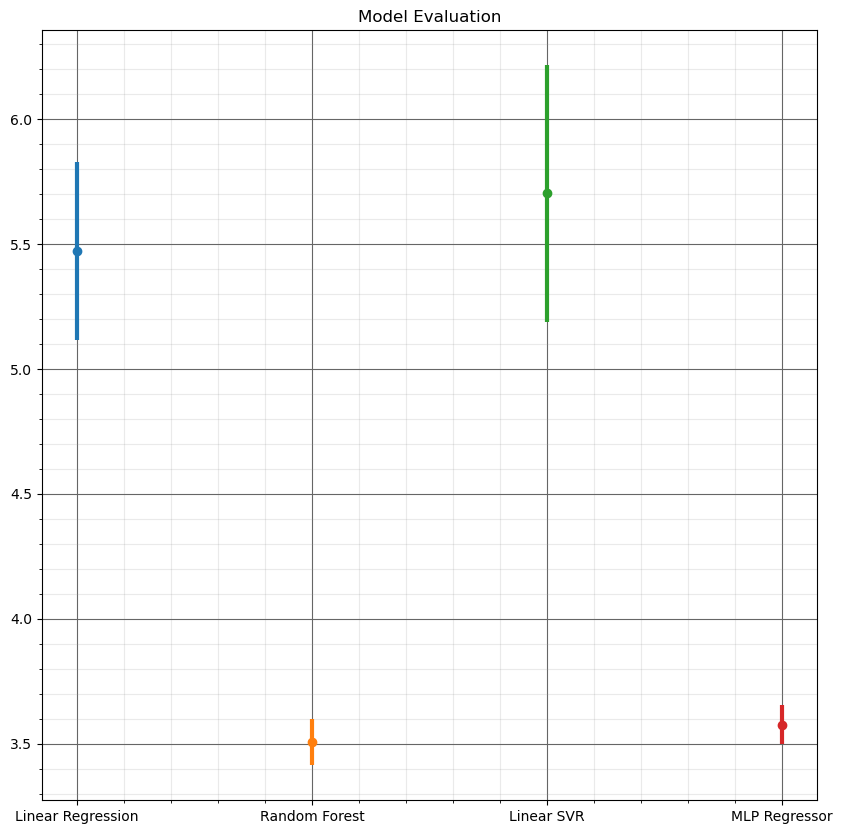

In [20]:
plt.figure(figsize=(10, 10))
for i, (model_mean, model_std) in enumerate(zip(list_mean, list_std)):
    plt.errorbar(i, model_mean,
                 xerr=0,
                 yerr=model_std,
                 fmt='o',
                 linewidth=3)
    
plt.xticks(range(4), list_model)
plt.title("Model Evaluation")
plt.grid('visible',
         which='major',
         color='#666',
         linestyle='-')
plt.minorticks_on ()
plt.grid('visible',
         which='minor',
         color='#999',
         linestyle='-',
         alpha=0.2)
plt.show()

### Load the Best Model

Based on the comparison, load the Random Forest model which typically performs best for this task.

In [21]:
best_model = joblib.load('models/RF_model_tunned.joblib')

### Load Test Data

Load the test dataset for making final predictions. Note: We remove the `pickup_datetime` column to match the training data preprocessing.

In [22]:
X_test = pd.read_csv('data/uber_test.csv')
X_test.drop(columns='pickup_datetime', inplace=True)
X_test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,pickup_season,pickup_period,geo_distance
0,-73.975792,40.776299,-73.967140,40.788574,4,2015,1,5,22,Winter,Night,1.547205
1,-73.978827,40.744816,-73.856187,40.727704,2,2013,10,6,4,Autumn,Night,10.506739
2,-73.996363,40.715990,-74.004877,40.707024,2,2010,10,4,17,Autumn,Evenning,1.228383
3,-73.997152,40.747187,-73.929623,40.865922,1,2013,8,5,0,Summer,Night,14.374132
4,-73.957808,40.773403,-74.008700,40.733433,1,2010,12,5,15,Winter,Afternoon,6.174933


### Generate Predictions

Use the trained model to predict fare amounts for the test dataset.

In [23]:
y_pred = best_model.predict(X_test)

y_pred

array([ 6.71932039, 31.81533522,  6.37576972, ..., 18.92044772,
       10.38249819,  6.9210392 ], shape=(34347,))

### Save Predictions to CSV

Export the predictions to a CSV file for submission or further analysis.

In [24]:
pd.DataFrame(y_pred).to_csv("prediction.csv", index=False)

---

## Conclutions

### Findings
- Successfully built and compared 4 regression models for Uber fare prediction
- The Random Forest model typically provides the best balance of accuracy and generalization
- Geographic distance (`geo_distance`) and temporal features (hour, day) are strong predictors of fare amount

### Model Performance Metrics
All models were evaluated using RMSE (Root Mean Squared Error) with 5-fold cross-validation:
- **Linear Regression**: Simple baseline model
- **Random Forest**: Best overall performer (selected for final predictions)
- **Linear SVR**: Good for handling outliers
- **MLP Regressor**: Captures non-linear relationships

### Files Generated
- `models/LR_model_tunned.joblib`: Trained Linear Regression model
- `models/RF_model_tunned.joblib`: Trained Random Forest model (best model)
- `models/SVM_model_tunned.joblib`: Trained Linear SVR model
- `models/MLP_model_tunned.joblib`: Trained MLP model
- `prediction.csv`: Test set predictions from the best model